In [7]:
import matplotlib.pyplot as plt
import cv2 as cv
import numpy as np
import keras
from keras import layers
from keras import models
from keras import optimizers

from keras.utils import plot_model
from keras import backend
import os
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from keras.utils.np_utils import to_categorical  


from scipy import ndimage
from random import randint


numbpath = "plate/trainimg/numbers/"
letterpath = "plate/trainimg/letters/"

num_files = os.listdir(numbpath)
let_files = os.listdir(letterpath)

cut_max = (130,255,255)
cut_min=(100, 150,45)

nLabels = [F[0] for F in num_files]
lLabels = [F[0] for F in let_files]

Labels = nLabels + lLabels

enc = LabelEncoder()
enc.fit(Labels)

numClasses = enc.transform(nLabels)
letClasses = enc.transform(lLabels)
Classes = enc.transform(Labels)

def cut_and_blur(img):
    hsv = cv.cvtColor(img, cv.COLOR_BGR2HSV)
    cut = cv.inRange(hsv, cut_min,cut_max)
    return ndimage.uniform_filter(cut, size=randint(7,17))

#Classes = to_categorical(Classes, num_classes = 36)

numbFrames = [np.array(cv.imread(numbpath + F)) for F in num_files]
letFrames = [np.array(cv.imread(letterpath + F)) for F in let_files]

Frames = numbFrames + letFrames
#print(Frames)
#Frames = [np.delete(x, range(100,110), 1) for x in Frames]
letFrames = [np.reshape(cv.resize(cut_and_blur(x), (64,64)), (64,64,1)) for x in letFrames]
letFrames = np.stack(letFrames).astype(float)/255
numbFrames = [np.reshape(cv.resize(cut_and_blur(x), (64,64)), (64,64,1)) for x in numbFrames]
numbFrames = np.stack(numbFrames).astype(float)/255
Frames = [np.reshape(cv.resize(cut_and_blur(x), (64,64)), (64,64,1)) for x in Frames]
Frames = np.stack(Frames).astype(float)/255

print(Frames.shape)
#Frames = Frames.reshape(Frames.shape[1]*Frames.shape[2]*Frames.shape[3], Frames.shape[0]).T
print(letFrames.shape)

xtrainL, xtestL, ytrainL, ytestL = train_test_split(letFrames, letClasses, test_size = 0.1)
xtrainL, xtestN, ytrainN, ytestN = train_test_split(numbFrames, numClasses, test_size = 0.1)
xtrain, xtest, ytrain, ytest  = train_test_split(Frames, Classes, test_size = 0.1)

(4472, 64, 64, 1)
(2236, 64, 64, 1)


In [8]:
# model = models.Sequential()
# model.add(layers.Conv2D(64, (3, 3), input_shape = (128,128,3), activation='relu',))
# model.add(layers.MaxPooling2D((2, 2)))
# model.add(layers.Conv2D(128, (3, 3), activation='relu'))
# model.add(layers.MaxPooling2D((2, 2)))
# model.add(lay ers.MaxPooling2D((2, 2)))
# model.add(layers.Flatten())
# model.add(layers.Dropout(0.5))
# model.add(layers.Dense(512, activation='relu'))
# model.add(layers.Dense(128, activation = 'relu'))
# model.add(layers.Dense(36, activation='softmax'))

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(64,64, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.5))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(36, activation='softmax'))

#adam = optimizers.adam(lr= 1e-3)

#train the model
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

model.fit(xtrain, ytrain,
         epochs=35,
         verbose=1)

Epoch 1/35
4024/4024 [==============================] - 14s 3ms/step - loss: 2.2176 - accuracy: 0.3912
Epoch 2/35
4024/4024 [==============================] - 16s 4ms/step - loss: 0.4666 - accuracy: 0.8427
Epoch 3/35
4024/4024 [==============================] - 18s 5ms/step - loss: 0.2272 - accuracy: 0.9242
Epoch 4/35
4024/4024 [==============================] - 18s 4ms/step - loss: 0.1402 - accuracy: 0.9528
Epoch 5/35
4024/4024 [==============================] - 18s 4ms/step - loss: 0.1195 - accuracy: 0.9607
Epoch 6/35
4024/4024 [==============================] - 16s 4ms/step - loss: 0.0917 - accuracy: 0.9747
Epoch 7/35
4024/4024 [==============================] - 16s 4ms/step - loss: 0.0809 - accuracy: 0.9729
Epoch 8/35
4024/4024 [==============================] - 15s 4ms/step - loss: 0.0741 - accuracy: 0.9771
Epoch 9/35
4024/4024 [==============================] - 15s 4ms/step - loss: 0.0570 - accuracy: 0.9816
Epoch 10/35
4024/4024 [==============================] - 16s 4ms/step - l

KeyboardInterrupt: 

In [9]:
pred = model.predict(xtest)
pred = enc.inverse_transform([np.argmax(x) for x in pred])

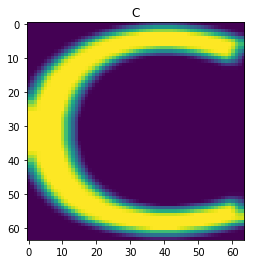

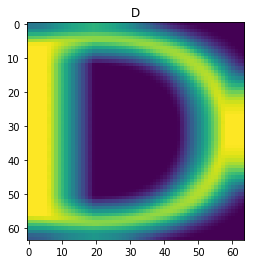

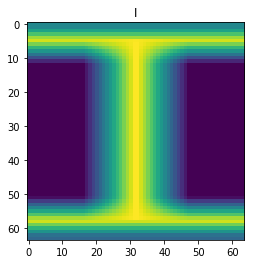

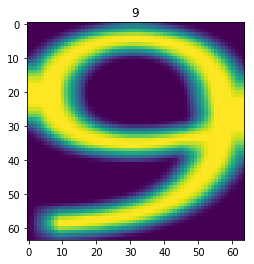

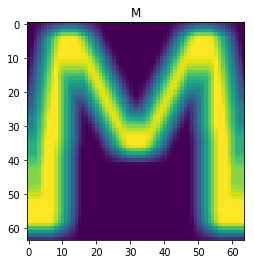

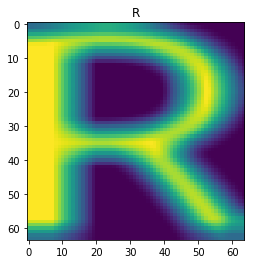

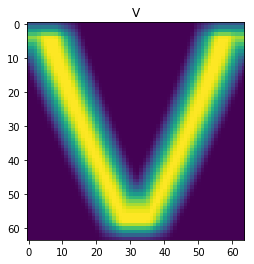

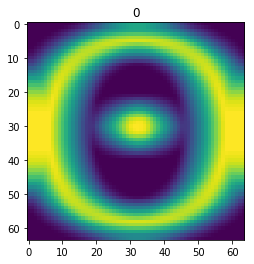

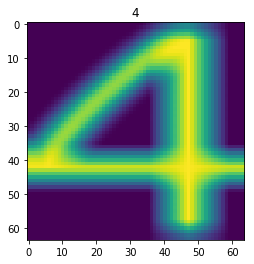

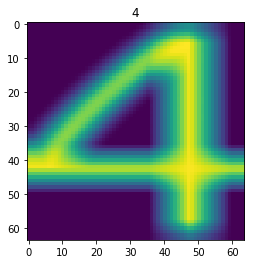

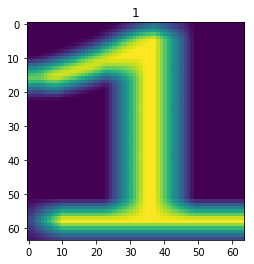

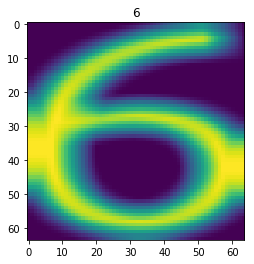

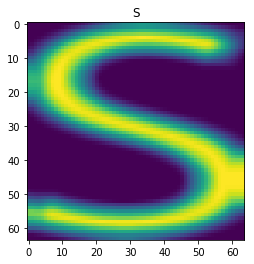

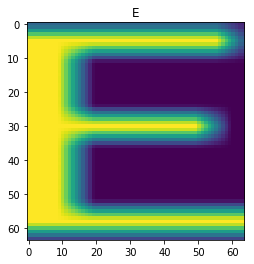

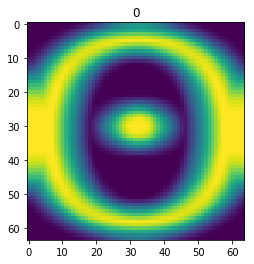

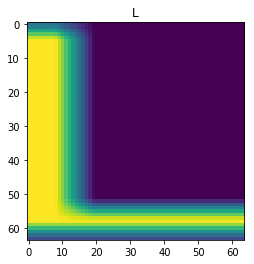

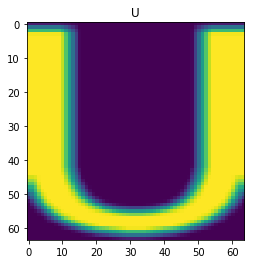

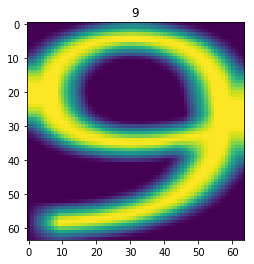

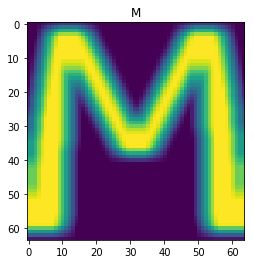

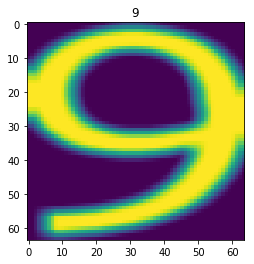

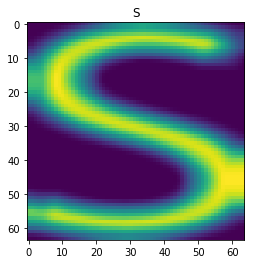

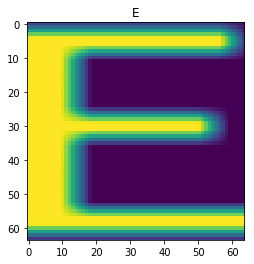

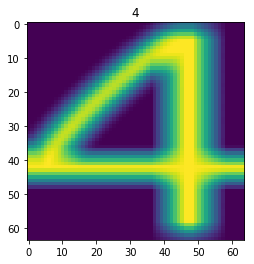

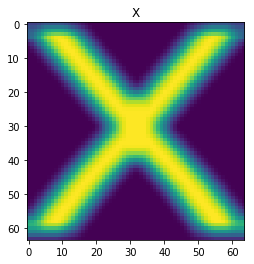

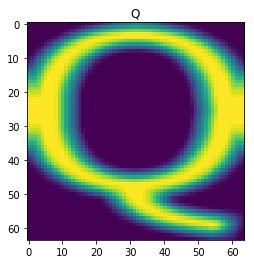

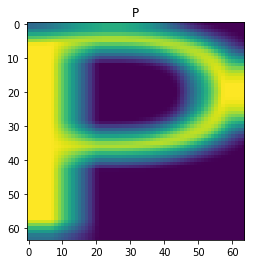

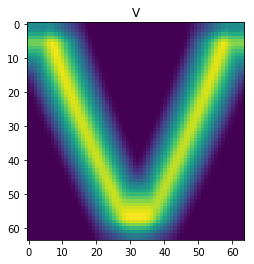

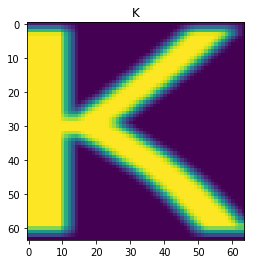

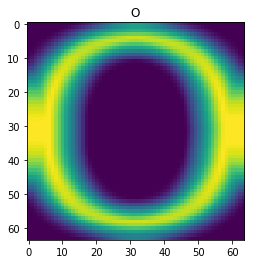

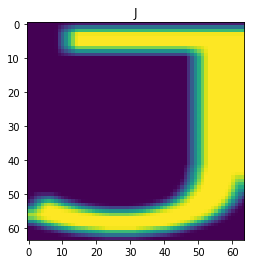

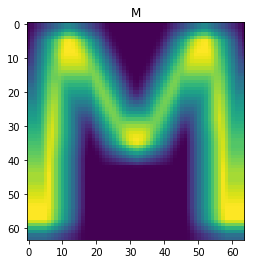

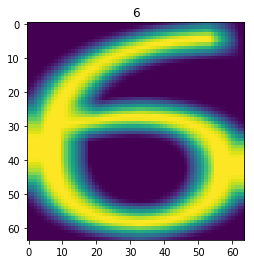

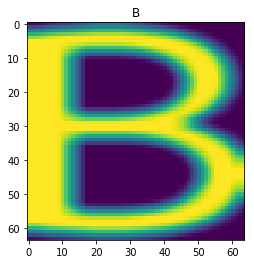

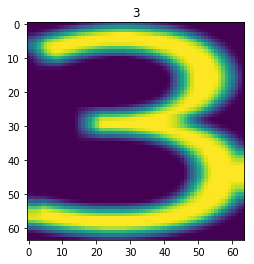

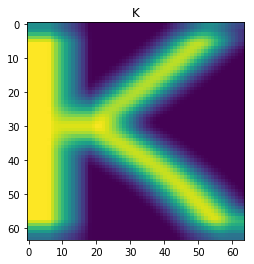

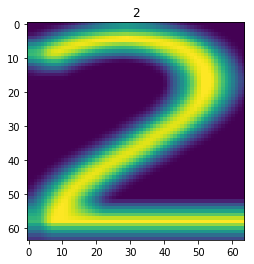

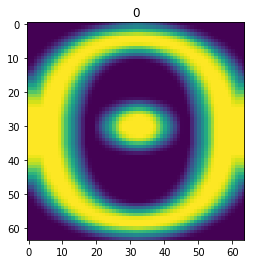

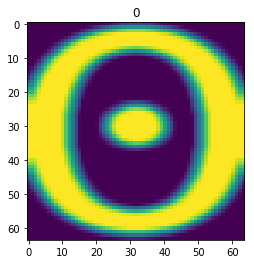

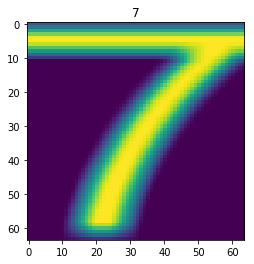

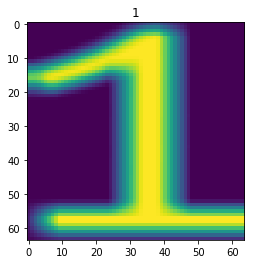

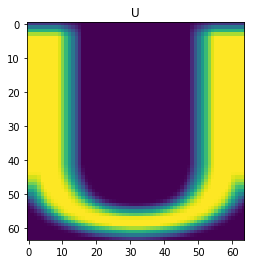

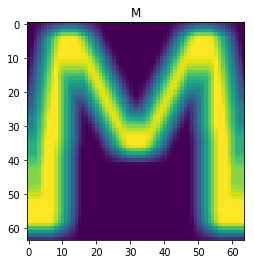

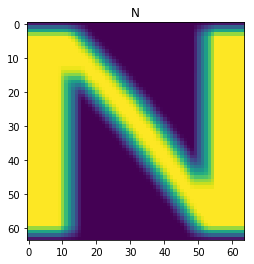

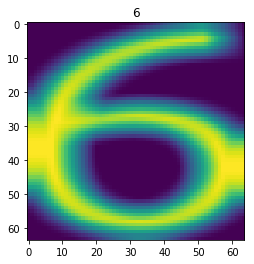

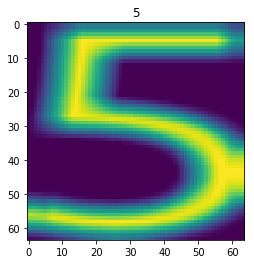

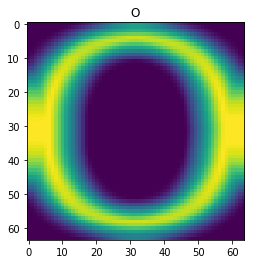

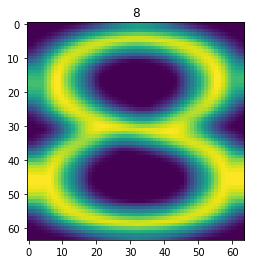

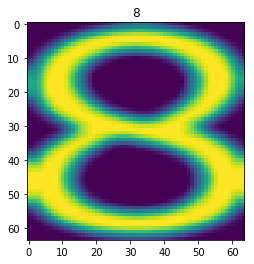

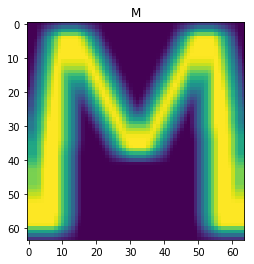

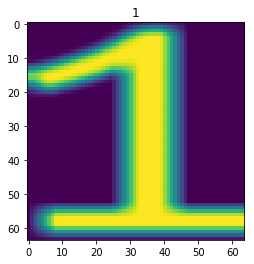

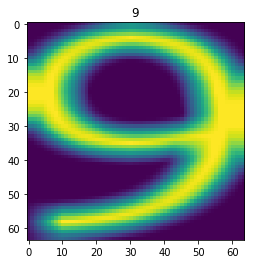

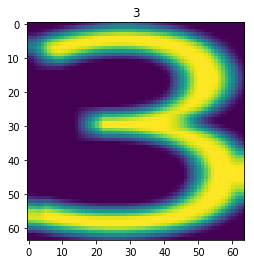

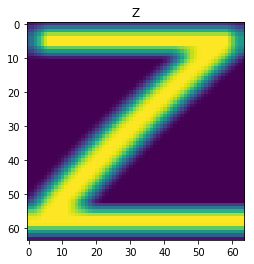

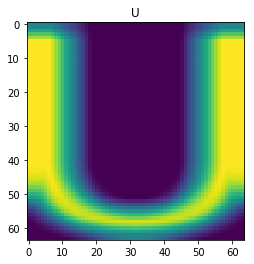

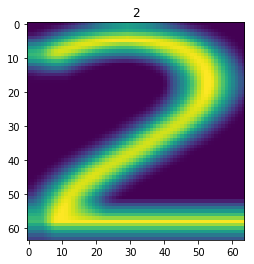

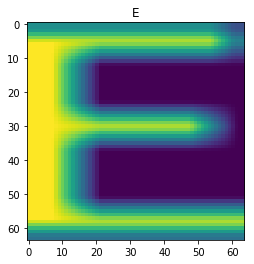

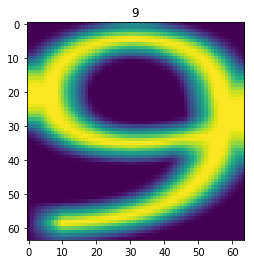

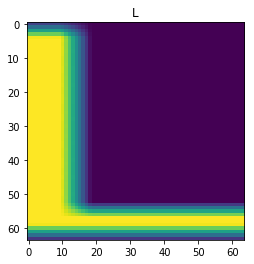

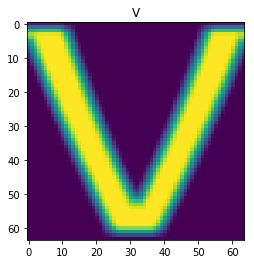

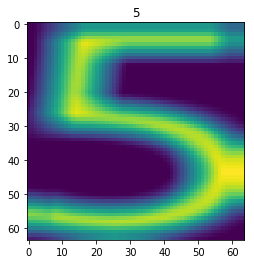

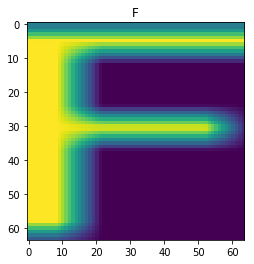

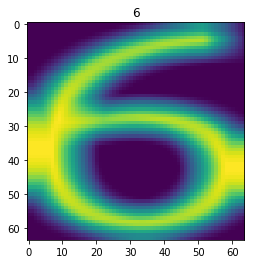

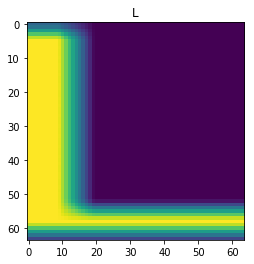

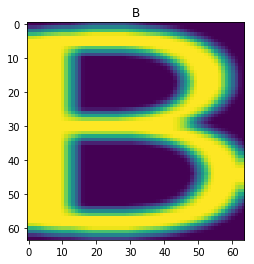

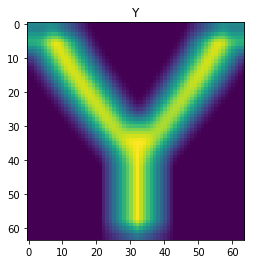

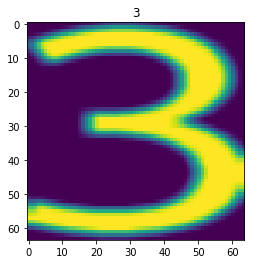

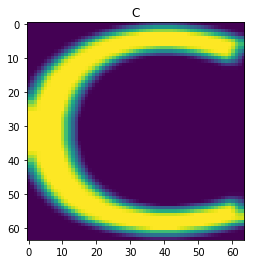

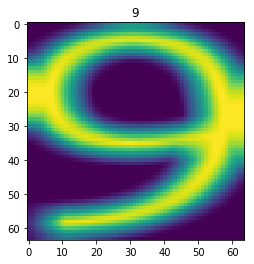

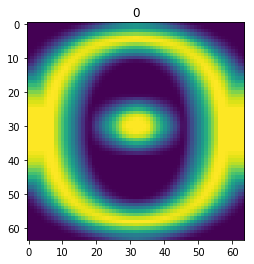

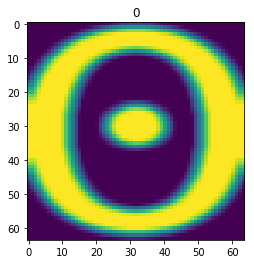

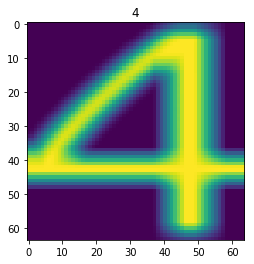

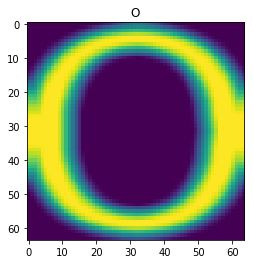

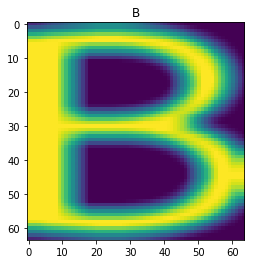

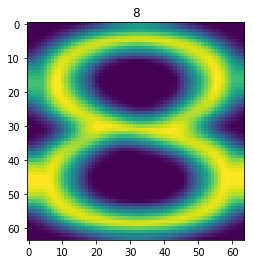

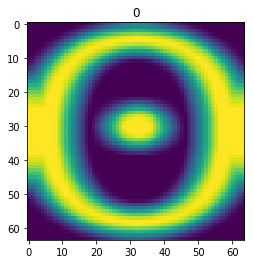

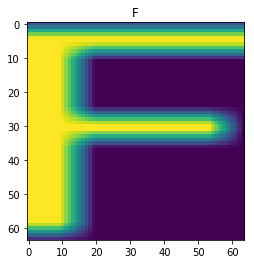

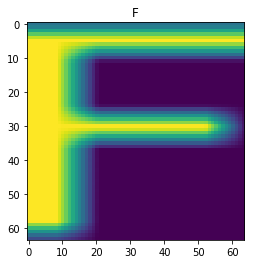

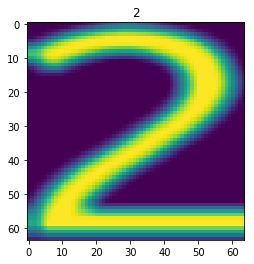

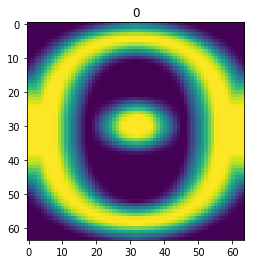

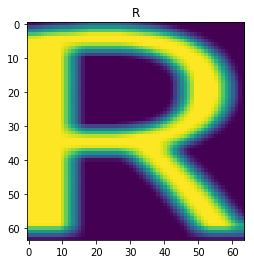

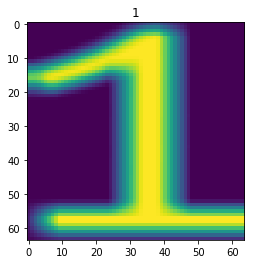

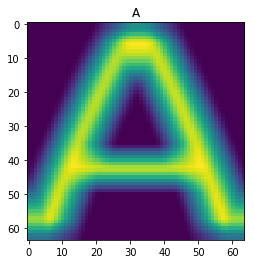

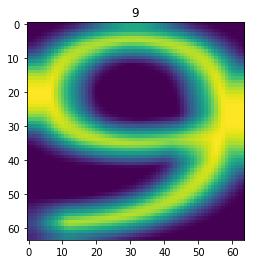

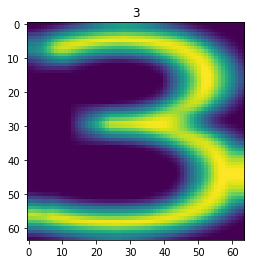

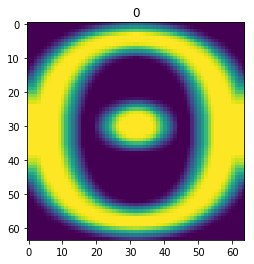

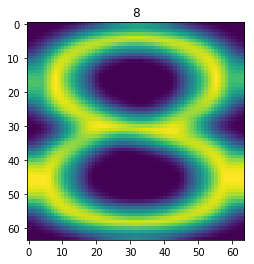

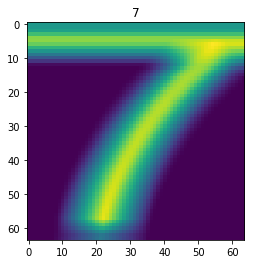

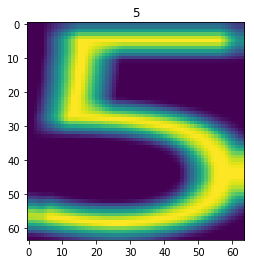

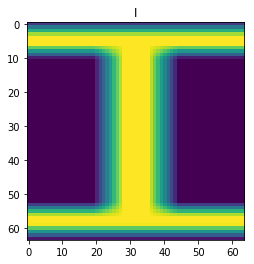

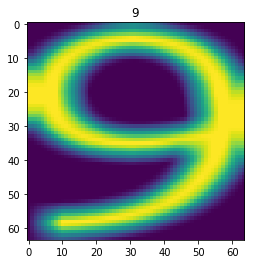

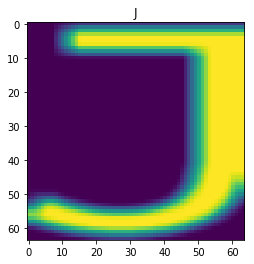

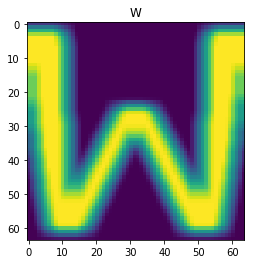

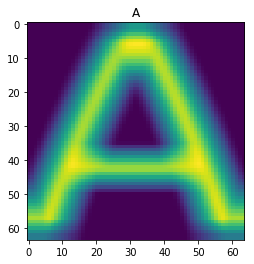

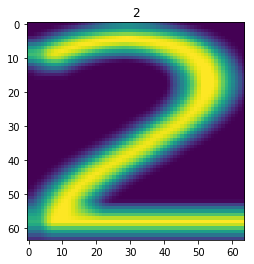

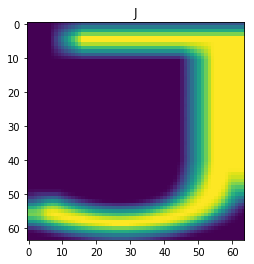

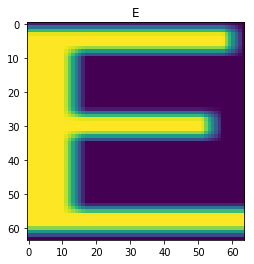

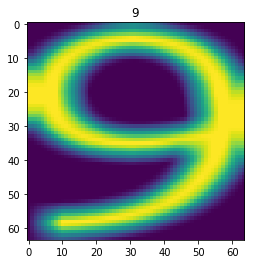

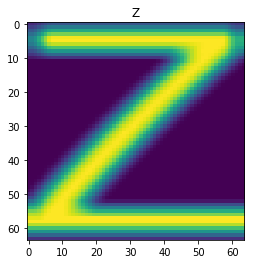

/home/zack/.local/lib/python2.7/site-packages/matplotlib/axis.py:1086: UserWarning: Unable to find pixel distance along axis for interval padding of ticks; assuming no interval padding needed.
  warnings.warn("Unable to find pixel distance along axis "


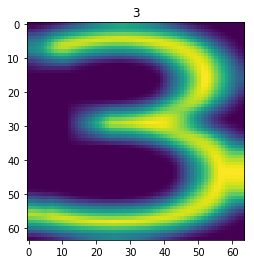

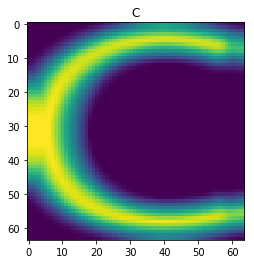

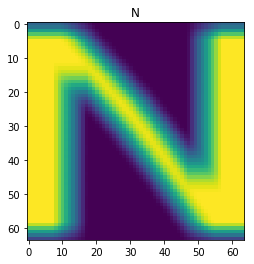

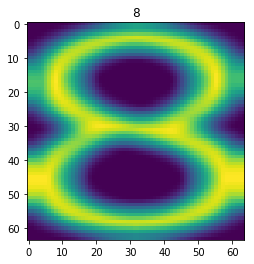

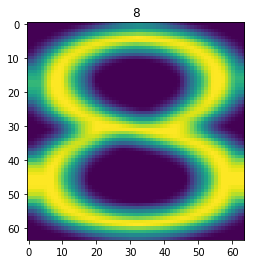

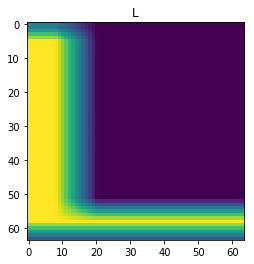

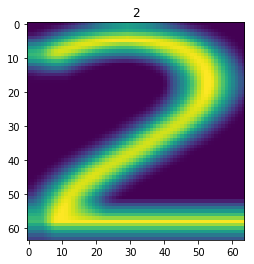

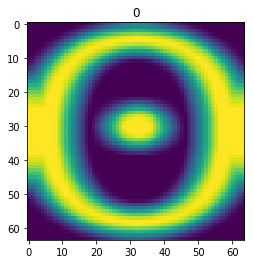

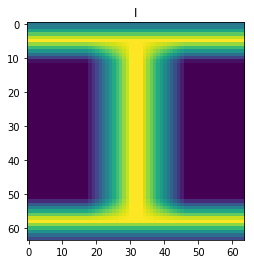

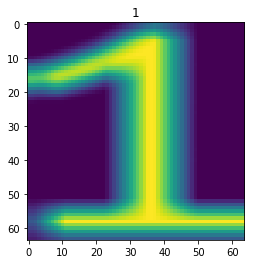

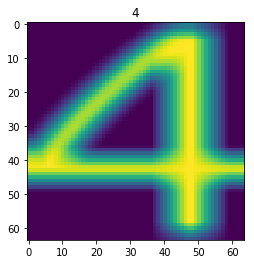

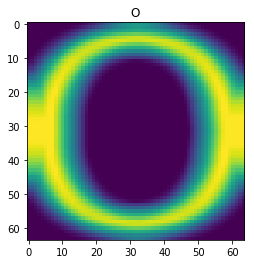

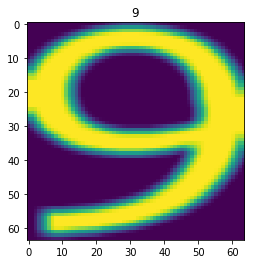

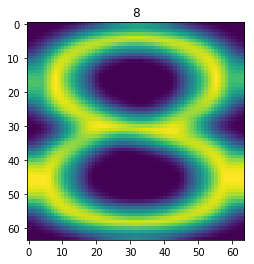

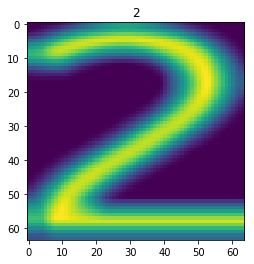

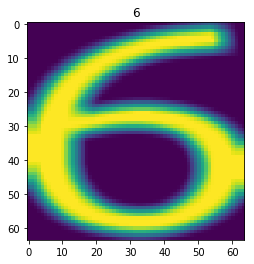

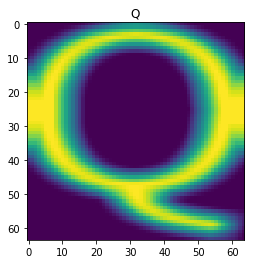

KeyboardInterrupt: 

In [10]:
testlabels = enc.inverse_transform(ytest)
i = 0
for fr in xtest:
    plt.imshow(fr[:,:,0])
    title = pred[i]
    plt.title(title)
    plt.show() #enc.inverse_transform([pred[i]])+ " " + enc.inverse_transform([ytest[i]]))
    i += 1

In [ ]:
import joblib
import pickle 
#joblib.dump(model, "cnn.jb")
with open('cnn.pkl', 'wb') as f:
    pickle.dump(model,f)
#joblib.dump(enc, "encoder.jb")


In [11]:
model.save('anothermodel_all.h5')

In [ ]:
out = clf.predict(model.predict(xtest))

In [ ]:
print(xtrain.shape[1:]+ (1,))

In [ ]:
model.fit(xtrain, ytrain,
         epochs=25,
         verbose=1)